# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
data= pd.read_csv('insurance.csv')

In [3]:
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
df= data.drop(['sex','bmi','smoker','region'], axis=1)

In [5]:
print(df)

      age  children      charges
0      19         0  16884.92400
1      18         1   1725.55230
2      28         3   4449.46200
3      33         0  21984.47061
4      32         0   3866.85520
...   ...       ...          ...
1333   50         3  10600.54830
1334   18         0   2205.98080
1335   18         0   1629.83350
1336   21         0   2007.94500
1337   61         0  29141.36030

[1338 rows x 3 columns]


In [6]:
df.drop_duplicates (inplace = True)
print(df.shape)

(1337, 3)


In [7]:
data_set= df.dropna()

In [8]:
print(data_set)

      age  children      charges
0      19         0  16884.92400
1      18         1   1725.55230
2      28         3   4449.46200
3      33         0  21984.47061
4      32         0   3866.85520
...   ...       ...          ...
1333   50         3  10600.54830
1334   18         0   2205.98080
1335   18         0   1629.83350
1336   21         0   2007.94500
1337   61         0  29141.36030

[1337 rows x 3 columns]


In [9]:
Data=data_set.to_numpy()

In [10]:
Data

array([[1.90000000e+01, 0.00000000e+00, 1.68849240e+04],
       [1.80000000e+01, 1.00000000e+00, 1.72555230e+03],
       [2.80000000e+01, 3.00000000e+00, 4.44946200e+03],
       ...,
       [1.80000000e+01, 0.00000000e+00, 1.62983350e+03],
       [2.10000000e+01, 0.00000000e+00, 2.00794500e+03],
       [6.10000000e+01, 0.00000000e+00, 2.91413603e+04]])

# linear regression

In [24]:
X = Data[:, :-1]  # age and children
y = Data[:, -1]   # charges


In [12]:
X_mean=np.mean(X,0)
X_mean

array([39.22213912,  1.09573672])

In [13]:
X_norm= X-X_mean

In [15]:
X_std= np.std(X_norm,0)
X_std

array([14.03907957,  1.20512049])

In [16]:
X_norm= X_norm/X_std

In [17]:
def costfunction (X,y, theta=[[0],[0],[0]]):
    m=y.size
    X_extend=np.c_[np.ones(m),X]
    h=X_extend.dot(theta)
    j=1/(2*m)*np.sum(np.square(h-y))
    return j

In [18]:
costfunction (X_norm,y)

161443092.25674194

In [19]:
def gradientDescent(X, y, theta=[[0],[0],[0]], alpha=0.01, num_iters=50):
    m=y.size
    X_extend=np.c_[np.ones(m),X]
    j_history=[]
    for i in range (num_iters):
        h=X_extend.dot(theta)
        theta=theta-(alpha/m)*y.T.dot(X_extend).T
        j=1/(2*m)*np.sum((h-y)**2)
        j_history.append(j)
    return theta,j_history

In [20]:
theta1,J1=gradientDescent (X_norm,y,alpha=0.1)
theta2,J2= gradientDescent ( X_norm, y, alpha=1)
theta3,J3=gradientDescent(X_norm,y,alpha=0.3)                         

In [21]:
theta1

array([[-66395.60743328],
       [-18056.34236056],
       [ -4079.02008456]])

In [22]:
theta2

array([[-663956.0743328 ],
       [-180563.42360565],
       [ -40790.2008456 ]])

In [23]:
theta3

array([[-199186.82229984],
       [ -54169.02708169],
       [ -12237.06025368]])

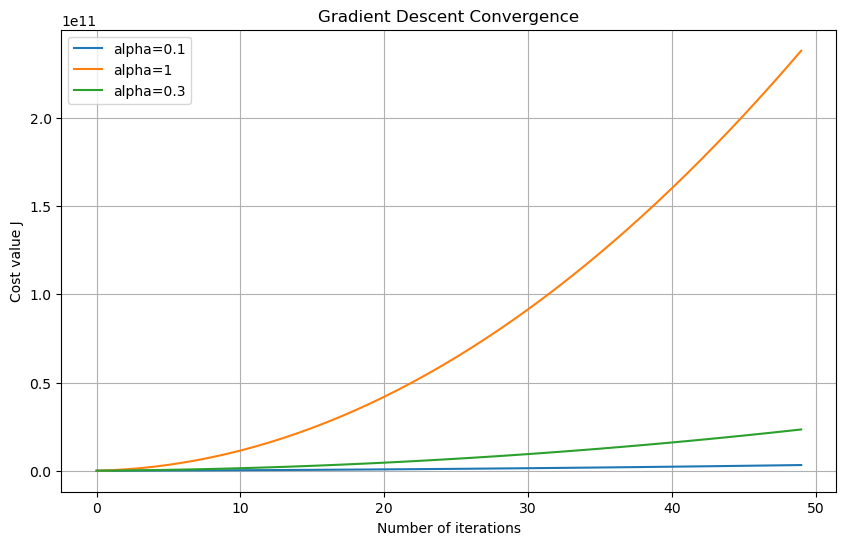

In [26]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(J1, label='alpha=0.1')
plt.plot(J2, label='alpha=1') 
plt.plot(J3, label='alpha=0.3')
plt.xlabel('Number of iterations')
plt.ylabel('Cost value J')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.grid(True)
plt.show()
           

In [28]:
# Make prediction for a new person
# Format: [age, children]
new_person = np.array([[35, 2]])  # Age 35 with 2 children

In [29]:
new_person_norm = (new_person - X_mean) / X_std

In [30]:
new_person_with_bias = np.c_[np.ones((new_person_norm.shape[0], 1)), new_person_norm]

In [31]:
price1 = new_person_with_bias.dot(theta1)[0,0]
price2 = new_person_with_bias.dot(theta2)[0,0]
price3 = new_person_with_bias.dot(theta3)[0,0]

print(f"\nInsurance cost predictions for {new_person[0,0]} year old with {new_person[0,1]} children:")
print(f"α=0.1: ${price1:,.2f}")
print(f"α=1: ${price2:,.2f}")
print(f"α=0.3: ${price3:,.2f}")


Insurance cost predictions for 35 year old with 2 children:
α=0.1: $-64,026.01
α=1: $-640,260.06
α=0.3: $-192,078.02
